In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder_path = "/data/NewsGuard/daily/"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [3]:
df_total = pd.DataFrame()
for csv in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv))
    df.name=csv
    print(df.shape)
    # let's add the date from the name of the file
    # taking name of the file, removing the extension and "metadata-"
    df["file_date"]=csv.split(".")[0].split("-")[1]
    # make file_date a datetime, with the format YYYYMMDD00
    df["file_date"]=pd.to_datetime(df["file_date"], format="%Y%m%d%H")
    
    df_total = pd.concat([df_total, df], axis=0)

(8863, 46)
(8844, 46)
(8858, 46)
(8845, 46)
(8863, 46)
(8845, 46)
(8864, 46)
(8845, 46)
(8892, 46)
(8855, 46)
(8894, 46)
(8856, 46)
(8894, 46)
(8856, 46)
(8894, 46)
(8866, 46)
(8898, 46)
(8868, 46)
(8901, 46)
(8869, 46)
(8901, 46)
(8869, 46)
(8905, 46)
(8869, 46)
(8908, 46)
(8895, 46)
(8908, 46)
(8897, 46)
(8909, 46)
(8898, 46)
(8919, 46)
(8898, 46)
(8922, 46)
(8898, 46)
(8929, 46)
(8900, 46)
(8933, 46)
(8904, 46)
(8935, 46)
(8905, 46)
(8935, 46)
(8908, 46)
(8935, 46)
(8909, 46)
(8942, 46)
(8914, 46)
(8948, 46)
(8915, 46)
(8952, 46)
(8915, 46)
(8958, 46)
(8918, 46)
(8962, 46)
(5227, 46)
(8962, 46)
(5227, 46)
(8962, 46)
(5230, 46)
(8970, 46)
(5230, 46)
(8971, 46)
(5232, 46)
(8975, 46)
(5232, 46)
(8977, 46)
(5238, 46)
(8980, 46)
(5242, 46)
(8982, 46)
(5244, 46)
(8982, 46)
(5245, 46)
(8985, 46)
(5247, 46)
(8990, 46)
(5247, 46)
(8992, 46)
(5247, 46)
(8997, 46)
(8833, 46)
(9001, 46)
(8850, 46)
(8866, 46)
(9001, 46)
(8873, 46)
(9001, 46)
(8878, 46)
(9017, 46)
(8882, 46)
(9043, 46)
(9050, 46)

In [9]:
# convert date format to only the day
df_total["file_day"] = pd.to_datetime(df_total.file_date).dt.to_period('d')

0    2022-05-13
1    2022-05-13
2    2022-05-13
3    2022-05-13
4    2022-05-13
Name: file_day, dtype: period[D]

In [12]:
#plot the distribution of file_day
df_total.file_day.nunique()

91

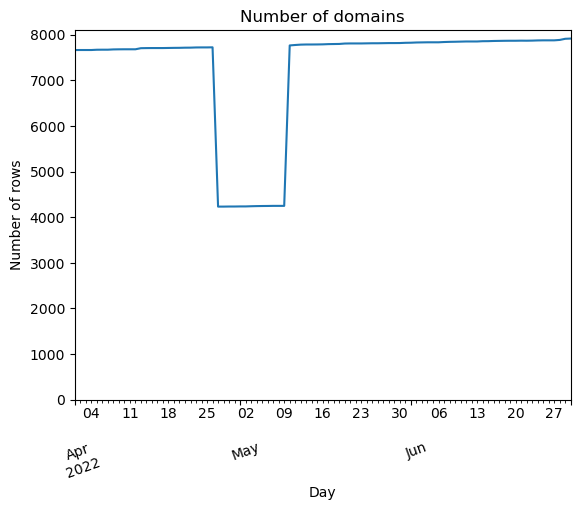

In [14]:
counts = df_total.groupby(df_total.file_day).Domain.nunique()
counts.plot()
plt.ylim(0)
plt.xlabel('Day')
plt.ylabel('Number of rows')
plt.xticks(rotation=20)
plt.title('Number of domains')
plt.savefig("sources_may_2022.png", dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(30, 10), sharey=True)
fig.suptitle('Comparison of the distributions of added/updated Scores per year-month')
for i, date in enumerate(df_total.file_day.unique()):
    # get sources that were updated from the previous file_day and the score is different from before
    if i==0:
        continue
    print(f"Date: {date}")
    ind=i
    # use Domain as index
    previous=df_total[df_total.file_day==df_total.file_day.unique()[i-1]].set_index("Domain").dropna(subset=["Score"])
    current=df_total[df_total.file_day==date].set_index("Domain").dropna(subset=["Score"])
    updated=pd.DataFrame(index=[], columns=df_total.columns)
    added= pd.DataFrame(index=[], columns=df_total.columns)

    for i, row in current.iterrows():
        if i in previous.index:
            if row["Score"]!=previous.loc[i]["Score"]:
                print(f"{i} changed from {previous.loc[i]['Score']} to {row['Score']}")
                # append dictionary to updated
                updated=pd.concat([updated, pd.DataFrame(row).T])
        else:
            print(f"{i} added")
            added=pd.concat([added, pd.DataFrame(row).T])
                
    print(f"Number of rows updated: {updated.shape}")
    a=updated.Score.plot.kde(ax=ax[0], xlim=(0,100), label=date.strftime("%m-%d"), bw_method=0.1)
    # add text to the line specifying the number of rows at the peak of the line

    added.Score.plot.kde(ax=ax[1], xlim=(0,100), label=date.strftime("%m-%d"), bw_method=0.1)
    ax[0].set_title("Updated sources")
    ax[1].set_title("Added sources")
    
# adding legend
fig.legend()
plt.tight_layout()
plt.savefig("scores_distribution_per_year.png", dpi=300)
plt.show()

In [15]:
sources_diff = {}
dates=df_total.file_y.unique()

for date in dates[1:]:
    # lets get a list of the sources added in the current date from the last one
    added=set(df_total[df_total.file_date==date].Domain.tolist())-set(df_total[df_total.file_date==dates[dates.tolist().index(date)-1]].Domain.tolist())
    removed=set(df_total[df_total.file_date==dates[dates.tolist().index(date)-1]].Domain.tolist())-set(df_total[df_total.file_date==date].Domain.tolist())
    sources_diff[date]=added, removed
    
# print the number of sources added and removed
for date in sources_diff.keys():
    print(f"{date.strftime('%Y-%m')} Sources added: {len(sources_diff[date][0])}, Sources removed: {len(sources_diff[date][1])}")

AttributeError: 'DataFrame' object has no attribute 'file_y'